# Demo for Neural Tangent Transfer (NTT) using Lenet-5 Caffe on MNIST.



Our experiment contains two phases:

1. In the **NTT optimization phase**, we use label-free data to learn the sparse NTT initialization.
2. In the **supervised learning phase**, where we reveal the labels and perform supervised learning using NTT initialization.

In this notebook, we use Lenet-5 CNN architecture on MNIST to demonstrate the usage of NTT. Concretely, we use NTT to yield a 97% layerwise sparse network using label-free data, and then use this *learned* sparse initialization in the subsequent image classification task. We compare the supervised results with randomly initialized sparse network.



In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from jax import random
import numpy as np
from nt_transfer import *
import numpy as onp
from nt_transfer.nn_models import model_dict
from nt_transfer.plot_tools import *
import matplotlib.ticker as ticker

# Phase I: Use NTT to initialize a layerwise sparse CNN with 3% non-zero weight 

In [2]:
# The hyper-parameters for NTT
gen_kwargs = dict(dataset_str =  'mnist',
                  model_str = 'cnn_lenet_caffe',               
                  NN_DENSITY_LEVEL_LIST = [0.03], # the fraction of weight remainining
                  OPTIMIZER_STR = 'adam', # the optimizer
                  NUM_RUNS = 2, # two runs (note that in our paper, we use NUM_RUNS = 5) 
                  NUM_EPOCHS  = 20, # number of epochs
                  BATCH_SIZE  = 64,  # batch size
                  STEP_SIZE = 5e-4,  # SGD step size
                  MASK_UPDATE_FREQ = 100, # mask update frequency
                  LAMBDA_KER_DIST = 1e-3, # the strength constant for NTK distance used in NTT loss function
                  LAMBDA_L2_REG = 1e-5, # the l2 regularization constant
                  SAVE_BOOL = True, 
                  save_dir = './../ntt_results/')

## Do gradient descent 

In [3]:
model = nt_transfer_model(**gen_kwargs, instance_input_shape = [28, 28, 1])
_, _, nt_trans_vali_all_sparsities_all_runs = model.optimize()

2020-06-13 12:59:20,099 Before transfer: trans dist 0.746 | ntk dist 633.828 | targ dist 0.081 | l2 pentalty 91.942 | nn density 0.03
2020-06-13 13:01:30,098 run: 01/02 | iter 0100/18720 | trans. dist 0.245 | ntk dist 176.745 | targ. dist 0.048 | l2 61.519 | nn density 0.03 | time 129.53 [s] | expected finish time 2020-06-14 02:27:35.338267
2020-06-13 13:01:56,288 run: 01/02 | iter 0200/18720 | trans. dist 0.105 | ntk dist 66.964 | targ. dist 0.017 | l2 65.951 | nn density 0.03 | time 25.72 [s] | expected finish time 2020-06-13 15:41:34.890719
2020-06-13 13:02:22,573 run: 01/02 | iter 0300/18720 | trans. dist 0.085 | ntk dist 50.916 | targ. dist 0.014 | l2 61.688 | nn density 0.03 | time 25.82 [s] | expected finish time 2020-06-13 15:42:11.656809
2020-06-13 13:02:48,895 run: 01/02 | iter 0400/18720 | trans. dist 0.075 | ntk dist 45.050 | targ. dist 0.011 | l2 56.654 | nn density 0.03 | time 25.86 [s] | expected finish time 2020-06-13 15:42:25.500547
2020-06-13 13:03:15,289 run: 01/02 |

2020-06-13 13:18:40,607 run: 01/02 | iter 4000/18720 | trans. dist 0.040 | ntk dist 27.571 | targ. dist 0.006 | l2 19.644 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:19:07,049 run: 01/02 | iter 4100/18720 | trans. dist 0.040 | ntk dist 27.644 | targ. dist 0.006 | l2 19.374 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:19:33,479 run: 01/02 | iter 4200/18720 | trans. dist 0.040 | ntk dist 27.690 | targ. dist 0.006 | l2 19.104 | nn density 0.03 | time 25.96 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:19:59,916 run: 01/02 | iter 4300/18720 | trans. dist 0.040 | ntk dist 27.439 | targ. dist 0.006 | l2 18.902 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:20:26,344 run: 01/02 | iter 4400/18720 | trans. dist 0.039 | ntk dist 27.362 | targ. dist 0.006 | l2 18.705 | nn density 0.03 | time 25.96 [s] | expected fini

2020-06-13 13:36:18,286 run: 01/02 | iter 8000/18720 | trans. dist 0.037 | ntk dist 26.600 | targ. dist 0.005 | l2 14.727 | nn density 0.03 | time 25.99 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:36:44,721 run: 01/02 | iter 8100/18720 | trans. dist 0.036 | ntk dist 25.894 | targ. dist 0.005 | l2 14.705 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:37:11,153 run: 01/02 | iter 8200/18720 | trans. dist 0.037 | ntk dist 26.604 | targ. dist 0.005 | l2 14.689 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:37:37,587 run: 01/02 | iter 8300/18720 | trans. dist 0.036 | ntk dist 26.063 | targ. dist 0.005 | l2 14.683 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:38:04,009 run: 01/02 | iter 8400/18720 | trans. dist 0.036 | ntk dist 26.023 | targ. dist 0.005 | l2 14.602 | nn density 0.03 | time 25.96 [s] | expected fini

2020-06-13 13:53:56,049 run: 01/02 | iter 12000/18720 | trans. dist 0.035 | ntk dist 25.464 | targ. dist 0.005 | l2 13.816 | nn density 0.03 | time 25.96 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:54:22,513 run: 01/02 | iter 12100/18720 | trans. dist 0.035 | ntk dist 25.730 | targ. dist 0.005 | l2 13.778 | nn density 0.03 | time 26.00 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:54:48,954 run: 01/02 | iter 12200/18720 | trans. dist 0.035 | ntk dist 25.408 | targ. dist 0.005 | l2 13.764 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:55:15,418 run: 01/02 | iter 12300/18720 | trans. dist 0.035 | ntk dist 25.645 | targ. dist 0.005 | l2 13.777 | nn density 0.03 | time 26.00 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 13:55:41,844 run: 01/02 | iter 12400/18720 | trans. dist 0.035 | ntk dist 25.494 | targ. dist 0.005 | l2 13.748 | nn density 0.03 | time 25.96 [s] | expected

2020-06-13 14:11:33,616 run: 01/02 | iter 16000/18720 | trans. dist 0.035 | ntk dist 25.652 | targ. dist 0.005 | l2 13.282 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:12:00,063 run: 01/02 | iter 16100/18720 | trans. dist 0.034 | ntk dist 25.296 | targ. dist 0.005 | l2 13.287 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:12:26,488 run: 01/02 | iter 16200/18720 | trans. dist 0.035 | ntk dist 25.343 | targ. dist 0.005 | l2 13.255 | nn density 0.03 | time 25.96 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:12:52,907 run: 01/02 | iter 16300/18720 | trans. dist 0.035 | ntk dist 25.538 | targ. dist 0.005 | l2 13.256 | nn density 0.03 | time 25.96 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:13:19,343 run: 01/02 | iter 16400/18720 | trans. dist 0.035 | ntk dist 25.480 | targ. dist 0.005 | l2 13.245 | nn density 0.03 | time 25.97 [s] | expected

2020-06-13 14:30:32,586 run: 02/02 | iter 1200/18720 | trans. dist 0.039 | ntk dist 22.022 | targ. dist 0.006 | l2 34.663 | nn density 0.03 | time 26.01 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:30:59,035 run: 02/02 | iter 1300/18720 | trans. dist 0.038 | ntk dist 22.107 | targ. dist 0.005 | l2 33.054 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:31:25,517 run: 02/02 | iter 1400/18720 | trans. dist 0.037 | ntk dist 21.546 | targ. dist 0.005 | l2 31.372 | nn density 0.03 | time 26.01 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:31:51,979 run: 02/02 | iter 1500/18720 | trans. dist 0.037 | ntk dist 21.453 | targ. dist 0.005 | l2 30.379 | nn density 0.03 | time 26.00 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:32:18,433 run: 02/02 | iter 1600/18720 | trans. dist 0.037 | ntk dist 21.692 | targ. dist 0.005 | l2 29.414 | nn density 0.03 | time 25.99 [s] | expected fini

2020-06-13 14:48:11,054 run: 02/02 | iter 5200/18720 | trans. dist 0.026 | ntk dist 17.134 | targ. dist 0.004 | l2 15.357 | nn density 0.03 | time 26.02 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:48:37,519 run: 02/02 | iter 5300/18720 | trans. dist 0.026 | ntk dist 17.070 | targ. dist 0.004 | l2 15.217 | nn density 0.03 | time 26.00 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:49:03,992 run: 02/02 | iter 5400/18720 | trans. dist 0.026 | ntk dist 17.017 | targ. dist 0.004 | l2 15.093 | nn density 0.03 | time 26.01 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:49:30,455 run: 02/02 | iter 5500/18720 | trans. dist 0.026 | ntk dist 17.031 | targ. dist 0.004 | l2 14.962 | nn density 0.03 | time 26.00 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 14:49:56,931 run: 02/02 | iter 5600/18720 | trans. dist 0.025 | ntk dist 16.762 | targ. dist 0.004 | l2 14.825 | nn density 0.03 | time 26.01 [s] | expected fini

2020-06-13 15:05:49,388 run: 02/02 | iter 9200/18720 | trans. dist 0.023 | ntk dist 15.927 | targ. dist 0.003 | l2 12.107 | nn density 0.03 | time 25.99 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:06:15,843 run: 02/02 | iter 9300/18720 | trans. dist 0.023 | ntk dist 15.819 | targ. dist 0.003 | l2 12.107 | nn density 0.03 | time 25.99 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:06:42,270 run: 02/02 | iter 9400/18720 | trans. dist 0.024 | ntk dist 15.912 | targ. dist 0.004 | l2 12.116 | nn density 0.03 | time 25.96 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:07:08,721 run: 02/02 | iter 9500/18720 | trans. dist 0.023 | ntk dist 15.907 | targ. dist 0.004 | l2 12.051 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:07:35,154 run: 02/02 | iter 9600/18720 | trans. dist 0.024 | ntk dist 16.214 | targ. dist 0.004 | l2 12.018 | nn density 0.03 | time 25.97 [s] | expected fini

2020-06-13 15:23:28,060 run: 02/02 | iter 13200/18720 | trans. dist 0.023 | ntk dist 15.726 | targ. dist 0.003 | l2 11.254 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:23:54,529 run: 02/02 | iter 13300/18720 | trans. dist 0.023 | ntk dist 15.690 | targ. dist 0.004 | l2 11.236 | nn density 0.03 | time 26.00 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:24:20,980 run: 02/02 | iter 13400/18720 | trans. dist 0.023 | ntk dist 15.785 | targ. dist 0.003 | l2 11.221 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:24:47,417 run: 02/02 | iter 13500/18720 | trans. dist 0.023 | ntk dist 15.800 | targ. dist 0.004 | l2 11.192 | nn density 0.03 | time 25.97 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:25:13,877 run: 02/02 | iter 13600/18720 | trans. dist 0.023 | ntk dist 15.964 | targ. dist 0.004 | l2 11.177 | nn density 0.03 | time 25.99 [s] | expected

2020-06-13 15:41:06,338 run: 02/02 | iter 17200/18720 | trans. dist 0.023 | ntk dist 15.817 | targ. dist 0.004 | l2 10.959 | nn density 0.03 | time 26.01 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:41:32,870 run: 02/02 | iter 17300/18720 | trans. dist 0.023 | ntk dist 15.795 | targ. dist 0.004 | l2 10.976 | nn density 0.03 | time 25.99 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:41:59,316 run: 02/02 | iter 17400/18720 | trans. dist 0.023 | ntk dist 15.763 | targ. dist 0.003 | l2 10.951 | nn density 0.03 | time 25.98 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:42:25,792 run: 02/02 | iter 17500/18720 | trans. dist 0.023 | ntk dist 15.549 | targ. dist 0.004 | l2 10.939 | nn density 0.03 | time 26.01 [s] | expected finish time 2020-06-13 15:42:52.994860
2020-06-13 15:42:52,242 run: 02/02 | iter 17600/18720 | trans. dist 0.023 | ntk dist 15.757 | targ. dist 0.003 | l2 10.954 | nn density 0.03 | time 25.98 [s] | expected

## Visualize the NTT loss function.

Recall that the NTT loss function constaints two terms, the **target distance** and the **NTK distance**. We visualize both terms.

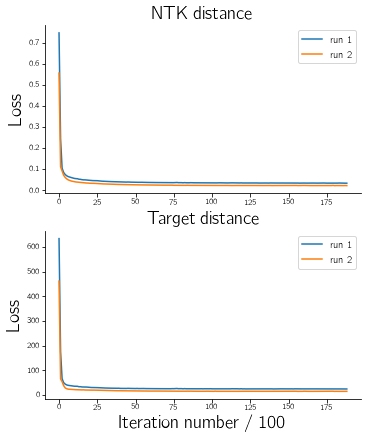

In [5]:
axis_font = 18

fig = plt.figure(constrained_layout=True, figsize=(5, 6))

gs = fig.add_gridspec(10, 12)
ax1 = fig.add_subplot(gs[:5, :])
        
# three trials of target distance
ax1.plot(nt_trans_vali_all_sparsities_all_runs[0][0][:,0], label = 'run 1');
ax1.plot(nt_trans_vali_all_sparsities_all_runs[0][1][:,0], label = 'run 2');
ax1.legend(ncol = 1) 
ax1.set_title('NTK distance', fontsize = axis_font)
ax1.set_ylabel('Loss', fontsize = axis_font)
ax1 = simpleaxis(ax1)

ax2 = fig.add_subplot(gs[5:, :])
ax2.plot(nt_trans_vali_all_sparsities_all_runs[0][0][:,1], label =  'run 1');
ax2.plot(nt_trans_vali_all_sparsities_all_runs[0][1][:,1], label =  'run 2');
ax2.legend(ncol = 1) 
ax2.set_title('Target distance', fontsize = axis_font)
ax2.set_ylabel('Loss', fontsize = axis_font)
ax2.set_xlabel('Iteration number / 100', fontsize = axis_font)
ax2 = simpleaxis(ax2)

# Phase II: Supervised learning

In [4]:
gen_kwargs_supervised = dict(
ntt_file_name = 'mnist_layerwise_prune_cnn_lenet_caffe', # the saved result in ntt_results file
dataset_str  = 'mnist', # dataset to use'
sup_density_list = [0.03],  # the density levels to achieve'
OPTIMIZER_STR = 'adam', # optimizer'
EXPLOITATION_NUM_EPOCHS = 50, #number of training epochs'
EXPLOITATION_BATCH_SIZE  = 64, # number of samples in a minibatch'
STEP_SIZE = 1e-3, # learning step-size'
REG = 1e-8, # l2 regularization constant'
EXPLOIT_TRAIN_DATASET_FRACTION = 0.1, # the fraction of training data used as validation data'
RECORD_ACC_FREQ = 100, # frequency for saving the training and testing result'  
save_supervised_result_bool = True)



model = exploit_model(ntt_file_name = gen_kwargs_supervised['ntt_file_name'], ntt_saved_path = './../ntt_results/', supervised_result_path = './../supervised_results/')


In [5]:

# Proposed method: NTT sparse initialization
sup_learning_results_ntt_init = model.supervised_optimization(wiring_str = 'trans',  ** gen_kwargs_supervised)

2020-06-14 14:56:38,038 NN density 0.03 | Run 001/002 | Iteration 001/42200 | Train acc 8.63% | Test acc 8.43%
2020-06-14 14:56:38,202 NN density 0.03 | Run 001/002 | Iteration 101/42200 | Train acc 85.48% | Test acc 86.27%
2020-06-14 14:56:38,365 NN density 0.03 | Run 001/002 | Iteration 201/42200 | Train acc 91.07% | Test acc 91.77%
2020-06-14 14:56:38,528 NN density 0.03 | Run 001/002 | Iteration 301/42200 | Train acc 91.80% | Test acc 92.31%
2020-06-14 14:56:38,691 NN density 0.03 | Run 001/002 | Iteration 401/42200 | Train acc 93.72% | Test acc 94.31%
2020-06-14 14:56:38,854 NN density 0.03 | Run 001/002 | Iteration 501/42200 | Train acc 94.44% | Test acc 95.00%
2020-06-14 14:56:39,017 NN density 0.03 | Run 001/002 | Iteration 601/42200 | Train acc 94.96% | Test acc 95.74%
2020-06-14 14:56:39,182 NN density 0.03 | Run 001/002 | Iteration 701/42200 | Train acc 95.67% | Test acc 95.90%
2020-06-14 14:56:39,347 NN density 0.03 | Run 001/002 | Iteration 801/42200 | Train acc 95.67% | T

2020-06-14 14:56:49,830 NN density 0.03 | Run 001/002 | Iteration 7201/42200 | Train acc 99.06% | Test acc 98.43%
2020-06-14 14:56:49,992 NN density 0.03 | Run 001/002 | Iteration 7301/42200 | Train acc 99.00% | Test acc 98.31%
2020-06-14 14:56:50,154 NN density 0.03 | Run 001/002 | Iteration 7401/42200 | Train acc 98.96% | Test acc 98.43%
2020-06-14 14:56:50,316 NN density 0.03 | Run 001/002 | Iteration 7501/42200 | Train acc 98.74% | Test acc 98.08%
2020-06-14 14:56:50,478 NN density 0.03 | Run 001/002 | Iteration 7601/42200 | Train acc 98.98% | Test acc 98.15%
2020-06-14 14:56:50,644 NN density 0.03 | Run 001/002 | Iteration 7701/42200 | Train acc 98.81% | Test acc 98.17%
2020-06-14 14:56:50,806 NN density 0.03 | Run 001/002 | Iteration 7801/42200 | Train acc 99.04% | Test acc 98.37%
2020-06-14 14:56:50,968 NN density 0.03 | Run 001/002 | Iteration 7901/42200 | Train acc 98.85% | Test acc 98.28%
2020-06-14 14:56:51,134 NN density 0.03 | Run 001/002 | Iteration 8001/42200 | Train acc

2020-06-14 14:57:01,544 NN density 0.03 | Run 001/002 | Iteration 14401/42200 | Train acc 99.48% | Test acc 98.33%
2020-06-14 14:57:01,706 NN density 0.03 | Run 001/002 | Iteration 14501/42200 | Train acc 99.59% | Test acc 98.49%
2020-06-14 14:57:01,867 NN density 0.03 | Run 001/002 | Iteration 14601/42200 | Train acc 99.37% | Test acc 98.30%
2020-06-14 14:57:02,028 NN density 0.03 | Run 001/002 | Iteration 14701/42200 | Train acc 99.69% | Test acc 98.32%
2020-06-14 14:57:02,191 NN density 0.03 | Run 001/002 | Iteration 14801/42200 | Train acc 99.57% | Test acc 98.35%
2020-06-14 14:57:02,353 NN density 0.03 | Run 001/002 | Iteration 14901/42200 | Train acc 99.56% | Test acc 98.32%
2020-06-14 14:57:02,514 NN density 0.03 | Run 001/002 | Iteration 15001/42200 | Train acc 99.59% | Test acc 98.55%
2020-06-14 14:57:02,675 NN density 0.03 | Run 001/002 | Iteration 15101/42200 | Train acc 99.43% | Test acc 98.34%
2020-06-14 14:57:02,837 NN density 0.03 | Run 001/002 | Iteration 15201/42200 | 

2020-06-14 14:57:13,205 NN density 0.03 | Run 001/002 | Iteration 21601/42200 | Train acc 99.69% | Test acc 98.10%
2020-06-14 14:57:13,366 NN density 0.03 | Run 001/002 | Iteration 21701/42200 | Train acc 99.65% | Test acc 98.30%
2020-06-14 14:57:13,528 NN density 0.03 | Run 001/002 | Iteration 21801/42200 | Train acc 99.59% | Test acc 97.96%
2020-06-14 14:57:13,689 NN density 0.03 | Run 001/002 | Iteration 21901/42200 | Train acc 99.67% | Test acc 98.31%
2020-06-14 14:57:13,851 NN density 0.03 | Run 001/002 | Iteration 22001/42200 | Train acc 99.67% | Test acc 98.14%
2020-06-14 14:57:14,013 NN density 0.03 | Run 001/002 | Iteration 22101/42200 | Train acc 99.69% | Test acc 98.28%
2020-06-14 14:57:14,174 NN density 0.03 | Run 001/002 | Iteration 22201/42200 | Train acc 99.80% | Test acc 98.26%
2020-06-14 14:57:14,336 NN density 0.03 | Run 001/002 | Iteration 22301/42200 | Train acc 99.65% | Test acc 98.20%
2020-06-14 14:57:14,497 NN density 0.03 | Run 001/002 | Iteration 22401/42200 | 

2020-06-14 14:57:24,900 NN density 0.03 | Run 001/002 | Iteration 28801/42200 | Train acc 99.89% | Test acc 98.41%
2020-06-14 14:57:25,061 NN density 0.03 | Run 001/002 | Iteration 28901/42200 | Train acc 99.96% | Test acc 98.38%
2020-06-14 14:57:25,223 NN density 0.03 | Run 001/002 | Iteration 29001/42200 | Train acc 99.89% | Test acc 98.34%
2020-06-14 14:57:25,384 NN density 0.03 | Run 001/002 | Iteration 29101/42200 | Train acc 99.74% | Test acc 98.32%
2020-06-14 14:57:25,550 NN density 0.03 | Run 001/002 | Iteration 29201/42200 | Train acc 99.96% | Test acc 98.35%
2020-06-14 14:57:25,713 NN density 0.03 | Run 001/002 | Iteration 29301/42200 | Train acc 99.89% | Test acc 98.42%
2020-06-14 14:57:25,875 NN density 0.03 | Run 001/002 | Iteration 29401/42200 | Train acc 99.91% | Test acc 98.29%
2020-06-14 14:57:26,036 NN density 0.03 | Run 001/002 | Iteration 29501/42200 | Train acc 99.76% | Test acc 98.23%
2020-06-14 14:57:26,198 NN density 0.03 | Run 001/002 | Iteration 29601/42200 | 

2020-06-14 14:57:36,556 NN density 0.03 | Run 001/002 | Iteration 36001/42200 | Train acc 99.87% | Test acc 98.38%
2020-06-14 14:57:36,717 NN density 0.03 | Run 001/002 | Iteration 36101/42200 | Train acc 99.91% | Test acc 98.39%
2020-06-14 14:57:36,878 NN density 0.03 | Run 001/002 | Iteration 36201/42200 | Train acc 99.93% | Test acc 98.26%
2020-06-14 14:57:37,040 NN density 0.03 | Run 001/002 | Iteration 36301/42200 | Train acc 99.89% | Test acc 98.46%
2020-06-14 14:57:37,201 NN density 0.03 | Run 001/002 | Iteration 36401/42200 | Train acc 99.94% | Test acc 98.51%
2020-06-14 14:57:37,363 NN density 0.03 | Run 001/002 | Iteration 36501/42200 | Train acc 99.93% | Test acc 98.40%
2020-06-14 14:57:37,525 NN density 0.03 | Run 001/002 | Iteration 36601/42200 | Train acc 99.98% | Test acc 98.49%
2020-06-14 14:57:37,687 NN density 0.03 | Run 001/002 | Iteration 36701/42200 | Train acc 99.98% | Test acc 98.51%
2020-06-14 14:57:37,853 NN density 0.03 | Run 001/002 | Iteration 36801/42200 | 

2020-06-14 14:57:48,169 NN density 0.03 | Run 002/002 | Iteration 1001/42200 | Train acc 95.43% | Test acc 96.17%
2020-06-14 14:57:48,329 NN density 0.03 | Run 002/002 | Iteration 1101/42200 | Train acc 95.63% | Test acc 96.24%
2020-06-14 14:57:48,490 NN density 0.03 | Run 002/002 | Iteration 1201/42200 | Train acc 96.15% | Test acc 96.44%
2020-06-14 14:57:48,650 NN density 0.03 | Run 002/002 | Iteration 1301/42200 | Train acc 96.06% | Test acc 96.49%
2020-06-14 14:57:48,811 NN density 0.03 | Run 002/002 | Iteration 1401/42200 | Train acc 96.61% | Test acc 96.58%
2020-06-14 14:57:48,971 NN density 0.03 | Run 002/002 | Iteration 1501/42200 | Train acc 96.06% | Test acc 96.54%
2020-06-14 14:57:49,132 NN density 0.03 | Run 002/002 | Iteration 1601/42200 | Train acc 96.59% | Test acc 97.13%
2020-06-14 14:57:49,293 NN density 0.03 | Run 002/002 | Iteration 1701/42200 | Train acc 96.72% | Test acc 96.78%
2020-06-14 14:57:49,453 NN density 0.03 | Run 002/002 | Iteration 1801/42200 | Train acc

2020-06-14 14:57:59,756 NN density 0.03 | Run 002/002 | Iteration 8201/42200 | Train acc 98.67% | Test acc 97.89%
2020-06-14 14:57:59,916 NN density 0.03 | Run 002/002 | Iteration 8301/42200 | Train acc 99.26% | Test acc 98.30%
2020-06-14 14:58:00,078 NN density 0.03 | Run 002/002 | Iteration 8401/42200 | Train acc 99.17% | Test acc 98.38%
2020-06-14 14:58:00,239 NN density 0.03 | Run 002/002 | Iteration 8501/42200 | Train acc 99.19% | Test acc 98.37%
2020-06-14 14:58:00,401 NN density 0.03 | Run 002/002 | Iteration 8601/42200 | Train acc 99.28% | Test acc 98.19%
2020-06-14 14:58:00,562 NN density 0.03 | Run 002/002 | Iteration 8701/42200 | Train acc 98.74% | Test acc 98.27%
2020-06-14 14:58:00,723 NN density 0.03 | Run 002/002 | Iteration 8801/42200 | Train acc 98.76% | Test acc 98.17%
2020-06-14 14:58:00,884 NN density 0.03 | Run 002/002 | Iteration 8901/42200 | Train acc 99.07% | Test acc 98.26%
2020-06-14 14:58:01,045 NN density 0.03 | Run 002/002 | Iteration 9001/42200 | Train acc

2020-06-14 14:58:11,347 NN density 0.03 | Run 002/002 | Iteration 15401/42200 | Train acc 99.52% | Test acc 98.28%
2020-06-14 14:58:11,507 NN density 0.03 | Run 002/002 | Iteration 15501/42200 | Train acc 99.63% | Test acc 98.45%
2020-06-14 14:58:11,668 NN density 0.03 | Run 002/002 | Iteration 15601/42200 | Train acc 99.48% | Test acc 98.30%
2020-06-14 14:58:11,833 NN density 0.03 | Run 002/002 | Iteration 15701/42200 | Train acc 99.41% | Test acc 98.39%
2020-06-14 14:58:11,995 NN density 0.03 | Run 002/002 | Iteration 15801/42200 | Train acc 99.44% | Test acc 98.39%
2020-06-14 14:58:12,156 NN density 0.03 | Run 002/002 | Iteration 15901/42200 | Train acc 99.43% | Test acc 98.23%
2020-06-14 14:58:12,316 NN density 0.03 | Run 002/002 | Iteration 16001/42200 | Train acc 99.44% | Test acc 98.29%
2020-06-14 14:58:12,477 NN density 0.03 | Run 002/002 | Iteration 16101/42200 | Train acc 99.70% | Test acc 98.36%
2020-06-14 14:58:12,637 NN density 0.03 | Run 002/002 | Iteration 16201/42200 | 

2020-06-14 14:58:22,934 NN density 0.03 | Run 002/002 | Iteration 22601/42200 | Train acc 99.54% | Test acc 98.07%
2020-06-14 14:58:23,095 NN density 0.03 | Run 002/002 | Iteration 22701/42200 | Train acc 99.46% | Test acc 98.18%
2020-06-14 14:58:23,256 NN density 0.03 | Run 002/002 | Iteration 22801/42200 | Train acc 99.78% | Test acc 98.37%
2020-06-14 14:58:23,417 NN density 0.03 | Run 002/002 | Iteration 22901/42200 | Train acc 99.59% | Test acc 98.33%
2020-06-14 14:58:23,577 NN density 0.03 | Run 002/002 | Iteration 23001/42200 | Train acc 99.33% | Test acc 98.09%
2020-06-14 14:58:23,738 NN density 0.03 | Run 002/002 | Iteration 23101/42200 | Train acc 99.65% | Test acc 98.32%
2020-06-14 14:58:23,899 NN density 0.03 | Run 002/002 | Iteration 23201/42200 | Train acc 99.80% | Test acc 98.34%
2020-06-14 14:58:24,060 NN density 0.03 | Run 002/002 | Iteration 23301/42200 | Train acc 99.63% | Test acc 98.15%
2020-06-14 14:58:24,221 NN density 0.03 | Run 002/002 | Iteration 23401/42200 | 

2020-06-14 14:58:34,536 NN density 0.03 | Run 002/002 | Iteration 29801/42200 | Train acc 99.80% | Test acc 98.31%
2020-06-14 14:58:34,698 NN density 0.03 | Run 002/002 | Iteration 29901/42200 | Train acc 99.83% | Test acc 98.30%
2020-06-14 14:58:34,859 NN density 0.03 | Run 002/002 | Iteration 30001/42200 | Train acc 99.91% | Test acc 98.33%
2020-06-14 14:58:35,019 NN density 0.03 | Run 002/002 | Iteration 30101/42200 | Train acc 99.91% | Test acc 98.49%
2020-06-14 14:58:35,180 NN density 0.03 | Run 002/002 | Iteration 30201/42200 | Train acc 99.74% | Test acc 98.17%
2020-06-14 14:58:35,341 NN density 0.03 | Run 002/002 | Iteration 30301/42200 | Train acc 99.70% | Test acc 98.29%
2020-06-14 14:58:35,502 NN density 0.03 | Run 002/002 | Iteration 30401/42200 | Train acc 99.72% | Test acc 98.24%
2020-06-14 14:58:35,665 NN density 0.03 | Run 002/002 | Iteration 30501/42200 | Train acc 99.91% | Test acc 98.35%
2020-06-14 14:58:35,831 NN density 0.03 | Run 002/002 | Iteration 30601/42200 | 

2020-06-14 14:58:46,172 NN density 0.03 | Run 002/002 | Iteration 37001/42200 | Train acc 99.76% | Test acc 98.21%
2020-06-14 14:58:46,339 NN density 0.03 | Run 002/002 | Iteration 37101/42200 | Train acc 99.94% | Test acc 98.42%
2020-06-14 14:58:46,500 NN density 0.03 | Run 002/002 | Iteration 37201/42200 | Train acc 99.98% | Test acc 98.33%
2020-06-14 14:58:46,662 NN density 0.03 | Run 002/002 | Iteration 37301/42200 | Train acc 99.81% | Test acc 98.35%
2020-06-14 14:58:46,823 NN density 0.03 | Run 002/002 | Iteration 37401/42200 | Train acc 99.70% | Test acc 97.92%
2020-06-14 14:58:46,984 NN density 0.03 | Run 002/002 | Iteration 37501/42200 | Train acc 99.87% | Test acc 98.19%
2020-06-14 14:58:47,145 NN density 0.03 | Run 002/002 | Iteration 37601/42200 | Train acc 99.48% | Test acc 98.24%
2020-06-14 14:58:47,306 NN density 0.03 | Run 002/002 | Iteration 37701/42200 | Train acc 99.89% | Test acc 98.22%
2020-06-14 14:58:47,466 NN density 0.03 | Run 002/002 | Iteration 37801/42200 | 

In [6]:
# Baseline method: random sparse initialization
sup_learning_results_rand_init = model.supervised_optimization(wiring_str = 'rand',  ** gen_kwargs_supervised)



2020-06-14 14:59:07,034 NN density 0.03 | Run 001/002 | Iteration 001/42200 | Train acc 9.20% | Test acc 8.92%
2020-06-14 14:59:07,160 NN density 0.03 | Run 001/002 | Iteration 101/42200 | Train acc 29.46% | Test acc 29.48%
2020-06-14 14:59:07,286 NN density 0.03 | Run 001/002 | Iteration 201/42200 | Train acc 67.07% | Test acc 68.72%
2020-06-14 14:59:07,411 NN density 0.03 | Run 001/002 | Iteration 301/42200 | Train acc 78.74% | Test acc 80.37%
2020-06-14 14:59:07,536 NN density 0.03 | Run 001/002 | Iteration 401/42200 | Train acc 83.76% | Test acc 84.73%
2020-06-14 14:59:07,664 NN density 0.03 | Run 001/002 | Iteration 501/42200 | Train acc 86.30% | Test acc 86.82%
2020-06-14 14:59:07,789 NN density 0.03 | Run 001/002 | Iteration 601/42200 | Train acc 87.13% | Test acc 87.87%
2020-06-14 14:59:07,913 NN density 0.03 | Run 001/002 | Iteration 701/42200 | Train acc 87.89% | Test acc 88.74%
2020-06-14 14:59:08,038 NN density 0.03 | Run 001/002 | Iteration 801/42200 | Train acc 88.50% | T

2020-06-14 14:59:16,014 NN density 0.03 | Run 001/002 | Iteration 7201/42200 | Train acc 95.31% | Test acc 95.51%
2020-06-14 14:59:16,138 NN density 0.03 | Run 001/002 | Iteration 7301/42200 | Train acc 95.52% | Test acc 95.58%
2020-06-14 14:59:16,262 NN density 0.03 | Run 001/002 | Iteration 7401/42200 | Train acc 95.46% | Test acc 95.20%
2020-06-14 14:59:16,391 NN density 0.03 | Run 001/002 | Iteration 7501/42200 | Train acc 95.39% | Test acc 95.12%
2020-06-14 14:59:16,516 NN density 0.03 | Run 001/002 | Iteration 7601/42200 | Train acc 95.83% | Test acc 95.53%
2020-06-14 14:59:16,644 NN density 0.03 | Run 001/002 | Iteration 7701/42200 | Train acc 95.72% | Test acc 95.70%
2020-06-14 14:59:16,768 NN density 0.03 | Run 001/002 | Iteration 7801/42200 | Train acc 95.61% | Test acc 95.61%
2020-06-14 14:59:16,893 NN density 0.03 | Run 001/002 | Iteration 7901/42200 | Train acc 95.74% | Test acc 95.56%
2020-06-14 14:59:17,017 NN density 0.03 | Run 001/002 | Iteration 8001/42200 | Train acc

2020-06-14 14:59:24,982 NN density 0.03 | Run 001/002 | Iteration 14401/42200 | Train acc 96.37% | Test acc 95.84%
2020-06-14 14:59:25,106 NN density 0.03 | Run 001/002 | Iteration 14501/42200 | Train acc 96.56% | Test acc 96.19%
2020-06-14 14:59:25,231 NN density 0.03 | Run 001/002 | Iteration 14601/42200 | Train acc 96.26% | Test acc 95.74%
2020-06-14 14:59:25,354 NN density 0.03 | Run 001/002 | Iteration 14701/42200 | Train acc 96.69% | Test acc 96.12%
2020-06-14 14:59:25,479 NN density 0.03 | Run 001/002 | Iteration 14801/42200 | Train acc 96.76% | Test acc 95.99%
2020-06-14 14:59:25,603 NN density 0.03 | Run 001/002 | Iteration 14901/42200 | Train acc 96.44% | Test acc 96.07%
2020-06-14 14:59:25,727 NN density 0.03 | Run 001/002 | Iteration 15001/42200 | Train acc 96.24% | Test acc 96.03%
2020-06-14 14:59:25,852 NN density 0.03 | Run 001/002 | Iteration 15101/42200 | Train acc 96.41% | Test acc 96.09%
2020-06-14 14:59:25,976 NN density 0.03 | Run 001/002 | Iteration 15201/42200 | 

2020-06-14 14:59:33,954 NN density 0.03 | Run 001/002 | Iteration 21601/42200 | Train acc 97.19% | Test acc 96.48%
2020-06-14 14:59:34,078 NN density 0.03 | Run 001/002 | Iteration 21701/42200 | Train acc 96.72% | Test acc 96.25%
2020-06-14 14:59:34,201 NN density 0.03 | Run 001/002 | Iteration 21801/42200 | Train acc 96.98% | Test acc 96.08%
2020-06-14 14:59:34,326 NN density 0.03 | Run 001/002 | Iteration 21901/42200 | Train acc 97.26% | Test acc 96.28%
2020-06-14 14:59:34,451 NN density 0.03 | Run 001/002 | Iteration 22001/42200 | Train acc 96.85% | Test acc 96.07%
2020-06-14 14:59:34,575 NN density 0.03 | Run 001/002 | Iteration 22101/42200 | Train acc 97.06% | Test acc 96.25%
2020-06-14 14:59:34,699 NN density 0.03 | Run 001/002 | Iteration 22201/42200 | Train acc 96.81% | Test acc 96.25%
2020-06-14 14:59:34,823 NN density 0.03 | Run 001/002 | Iteration 22301/42200 | Train acc 97.07% | Test acc 96.31%
2020-06-14 14:59:34,947 NN density 0.03 | Run 001/002 | Iteration 22401/42200 | 

2020-06-14 14:59:42,995 NN density 0.03 | Run 001/002 | Iteration 28801/42200 | Train acc 97.54% | Test acc 96.59%
2020-06-14 14:59:43,122 NN density 0.03 | Run 001/002 | Iteration 28901/42200 | Train acc 97.31% | Test acc 96.41%
2020-06-14 14:59:43,249 NN density 0.03 | Run 001/002 | Iteration 29001/42200 | Train acc 97.35% | Test acc 96.37%
2020-06-14 14:59:43,377 NN density 0.03 | Run 001/002 | Iteration 29101/42200 | Train acc 97.26% | Test acc 96.30%
2020-06-14 14:59:43,507 NN density 0.03 | Run 001/002 | Iteration 29201/42200 | Train acc 97.06% | Test acc 96.52%
2020-06-14 14:59:43,633 NN density 0.03 | Run 001/002 | Iteration 29301/42200 | Train acc 97.13% | Test acc 96.45%
2020-06-14 14:59:43,761 NN density 0.03 | Run 001/002 | Iteration 29401/42200 | Train acc 97.15% | Test acc 96.42%
2020-06-14 14:59:43,888 NN density 0.03 | Run 001/002 | Iteration 29501/42200 | Train acc 97.44% | Test acc 96.38%
2020-06-14 14:59:44,015 NN density 0.03 | Run 001/002 | Iteration 29601/42200 | 

2020-06-14 14:59:52,113 NN density 0.03 | Run 001/002 | Iteration 36001/42200 | Train acc 97.41% | Test acc 96.30%
2020-06-14 14:59:52,238 NN density 0.03 | Run 001/002 | Iteration 36101/42200 | Train acc 97.39% | Test acc 96.38%
2020-06-14 14:59:52,365 NN density 0.03 | Run 001/002 | Iteration 36201/42200 | Train acc 96.91% | Test acc 96.07%
2020-06-14 14:59:52,491 NN density 0.03 | Run 001/002 | Iteration 36301/42200 | Train acc 97.65% | Test acc 96.50%
2020-06-14 14:59:52,617 NN density 0.03 | Run 001/002 | Iteration 36401/42200 | Train acc 97.57% | Test acc 96.51%
2020-06-14 14:59:52,744 NN density 0.03 | Run 001/002 | Iteration 36501/42200 | Train acc 97.61% | Test acc 96.50%
2020-06-14 14:59:52,871 NN density 0.03 | Run 001/002 | Iteration 36601/42200 | Train acc 97.76% | Test acc 96.45%
2020-06-14 14:59:52,997 NN density 0.03 | Run 001/002 | Iteration 36701/42200 | Train acc 97.52% | Test acc 96.47%
2020-06-14 14:59:53,122 NN density 0.03 | Run 001/002 | Iteration 36801/42200 | 

2020-06-14 15:00:01,439 NN density 0.03 | Run 002/002 | Iteration 1001/42200 | Train acc 91.02% | Test acc 91.26%
2020-06-14 15:00:01,565 NN density 0.03 | Run 002/002 | Iteration 1101/42200 | Train acc 91.07% | Test acc 91.43%
2020-06-14 15:00:01,691 NN density 0.03 | Run 002/002 | Iteration 1201/42200 | Train acc 91.46% | Test acc 91.79%
2020-06-14 15:00:01,816 NN density 0.03 | Run 002/002 | Iteration 1301/42200 | Train acc 91.80% | Test acc 92.11%
2020-06-14 15:00:01,942 NN density 0.03 | Run 002/002 | Iteration 1401/42200 | Train acc 92.00% | Test acc 92.32%
2020-06-14 15:00:02,067 NN density 0.03 | Run 002/002 | Iteration 1501/42200 | Train acc 92.06% | Test acc 92.48%
2020-06-14 15:00:02,193 NN density 0.03 | Run 002/002 | Iteration 1601/42200 | Train acc 91.67% | Test acc 92.14%
2020-06-14 15:00:02,324 NN density 0.03 | Run 002/002 | Iteration 1701/42200 | Train acc 91.94% | Test acc 92.38%
2020-06-14 15:00:02,454 NN density 0.03 | Run 002/002 | Iteration 1801/42200 | Train acc

2020-06-14 15:00:10,635 NN density 0.03 | Run 002/002 | Iteration 8201/42200 | Train acc 96.20% | Test acc 95.86%
2020-06-14 15:00:10,764 NN density 0.03 | Run 002/002 | Iteration 8301/42200 | Train acc 96.28% | Test acc 96.00%
2020-06-14 15:00:10,894 NN density 0.03 | Run 002/002 | Iteration 8401/42200 | Train acc 96.31% | Test acc 96.05%
2020-06-14 15:00:11,023 NN density 0.03 | Run 002/002 | Iteration 8501/42200 | Train acc 96.41% | Test acc 95.95%
2020-06-14 15:00:11,152 NN density 0.03 | Run 002/002 | Iteration 8601/42200 | Train acc 96.24% | Test acc 95.95%
2020-06-14 15:00:11,280 NN density 0.03 | Run 002/002 | Iteration 8701/42200 | Train acc 96.17% | Test acc 96.03%
2020-06-14 15:00:11,409 NN density 0.03 | Run 002/002 | Iteration 8801/42200 | Train acc 96.46% | Test acc 95.92%
2020-06-14 15:00:11,538 NN density 0.03 | Run 002/002 | Iteration 8901/42200 | Train acc 96.24% | Test acc 95.74%
2020-06-14 15:00:11,667 NN density 0.03 | Run 002/002 | Iteration 9001/42200 | Train acc

2020-06-14 15:00:19,971 NN density 0.03 | Run 002/002 | Iteration 15401/42200 | Train acc 97.07% | Test acc 96.63%
2020-06-14 15:00:20,100 NN density 0.03 | Run 002/002 | Iteration 15501/42200 | Train acc 97.04% | Test acc 96.57%
2020-06-14 15:00:20,228 NN density 0.03 | Run 002/002 | Iteration 15601/42200 | Train acc 97.20% | Test acc 96.67%
2020-06-14 15:00:20,357 NN density 0.03 | Run 002/002 | Iteration 15701/42200 | Train acc 97.28% | Test acc 96.58%
2020-06-14 15:00:20,486 NN density 0.03 | Run 002/002 | Iteration 15801/42200 | Train acc 97.31% | Test acc 96.67%
2020-06-14 15:00:20,615 NN density 0.03 | Run 002/002 | Iteration 15901/42200 | Train acc 97.17% | Test acc 96.48%
2020-06-14 15:00:20,744 NN density 0.03 | Run 002/002 | Iteration 16001/42200 | Train acc 97.33% | Test acc 96.79%
2020-06-14 15:00:20,872 NN density 0.03 | Run 002/002 | Iteration 16101/42200 | Train acc 97.33% | Test acc 96.74%
2020-06-14 15:00:21,005 NN density 0.03 | Run 002/002 | Iteration 16201/42200 | 

2020-06-14 15:00:29,153 NN density 0.03 | Run 002/002 | Iteration 22601/42200 | Train acc 97.70% | Test acc 96.91%
2020-06-14 15:00:29,278 NN density 0.03 | Run 002/002 | Iteration 22701/42200 | Train acc 97.57% | Test acc 96.91%
2020-06-14 15:00:29,403 NN density 0.03 | Run 002/002 | Iteration 22801/42200 | Train acc 96.91% | Test acc 96.68%
2020-06-14 15:00:29,527 NN density 0.03 | Run 002/002 | Iteration 22901/42200 | Train acc 97.26% | Test acc 96.82%
2020-06-14 15:00:29,652 NN density 0.03 | Run 002/002 | Iteration 23001/42200 | Train acc 97.57% | Test acc 96.82%
2020-06-14 15:00:29,776 NN density 0.03 | Run 002/002 | Iteration 23101/42200 | Train acc 97.65% | Test acc 96.99%
2020-06-14 15:00:29,901 NN density 0.03 | Run 002/002 | Iteration 23201/42200 | Train acc 97.67% | Test acc 97.05%
2020-06-14 15:00:30,026 NN density 0.03 | Run 002/002 | Iteration 23301/42200 | Train acc 97.93% | Test acc 96.99%
2020-06-14 15:00:30,150 NN density 0.03 | Run 002/002 | Iteration 23401/42200 | 

2020-06-14 15:00:38,163 NN density 0.03 | Run 002/002 | Iteration 29801/42200 | Train acc 97.72% | Test acc 97.08%
2020-06-14 15:00:38,288 NN density 0.03 | Run 002/002 | Iteration 29901/42200 | Train acc 97.78% | Test acc 97.06%
2020-06-14 15:00:38,412 NN density 0.03 | Run 002/002 | Iteration 30001/42200 | Train acc 97.83% | Test acc 96.97%
2020-06-14 15:00:38,537 NN density 0.03 | Run 002/002 | Iteration 30101/42200 | Train acc 97.74% | Test acc 96.82%
2020-06-14 15:00:38,662 NN density 0.03 | Run 002/002 | Iteration 30201/42200 | Train acc 97.65% | Test acc 96.92%
2020-06-14 15:00:38,788 NN density 0.03 | Run 002/002 | Iteration 30301/42200 | Train acc 97.83% | Test acc 97.04%
2020-06-14 15:00:38,912 NN density 0.03 | Run 002/002 | Iteration 30401/42200 | Train acc 97.24% | Test acc 96.75%
2020-06-14 15:00:39,036 NN density 0.03 | Run 002/002 | Iteration 30501/42200 | Train acc 97.80% | Test acc 96.81%
2020-06-14 15:00:39,161 NN density 0.03 | Run 002/002 | Iteration 30601/42200 | 

2020-06-14 15:00:47,157 NN density 0.03 | Run 002/002 | Iteration 37001/42200 | Train acc 97.91% | Test acc 96.94%
2020-06-14 15:00:47,282 NN density 0.03 | Run 002/002 | Iteration 37101/42200 | Train acc 97.69% | Test acc 96.86%
2020-06-14 15:00:47,407 NN density 0.03 | Run 002/002 | Iteration 37201/42200 | Train acc 97.78% | Test acc 96.83%
2020-06-14 15:00:47,535 NN density 0.03 | Run 002/002 | Iteration 37301/42200 | Train acc 97.80% | Test acc 96.83%
2020-06-14 15:00:47,661 NN density 0.03 | Run 002/002 | Iteration 37401/42200 | Train acc 97.72% | Test acc 96.74%
2020-06-14 15:00:47,786 NN density 0.03 | Run 002/002 | Iteration 37501/42200 | Train acc 97.56% | Test acc 96.88%
2020-06-14 15:00:47,911 NN density 0.03 | Run 002/002 | Iteration 37601/42200 | Train acc 97.98% | Test acc 96.95%
2020-06-14 15:00:48,035 NN density 0.03 | Run 002/002 | Iteration 37701/42200 | Train acc 98.17% | Test acc 97.07%
2020-06-14 15:00:48,161 NN density 0.03 | Run 002/002 | Iteration 37801/42200 | 

## Show the mean accuracy of the supervised learning task

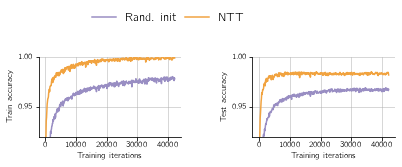

In [11]:
RECORD_ACC_FREQ = gen_kwargs_supervised['RECORD_ACC_FREQ']

fig, ax = plt.subplots(1, 2)

selected_density_list = ['0.03']

fig.subplots_adjust(left=.15, bottom=.3, right=.94, top=.75, wspace = 0.5)

plot_length = onp.arange(sup_learning_results_rand_init['train_results'][selected_density_list[0]].shape[1])

title_str = str(100 * round( 1 - onp.float32(selected_density_list[0]), 2)) + '\% sparse'

ax[0].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_rand_init['train_results'][selected_density_list[0]], axis = 0), label = 'Rand. init', color = '#998ec3', linestyle = '-',lw = 1.5)
ax[0].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_ntt_init['train_results'][selected_density_list[0]], axis = 0), ** gen_kwargs_ntt_student_plot)
ax[0].legend(loc='upper left', bbox_to_anchor= (0.3, 1.7), ncol= 2, columnspacing = 0.7, frameon=False, fontsize = 'large')

ax[0].grid(linestyle='-', linewidth='0.5')
ax[0].set_ylim([0.92, 1.0])
ax[0].set_yticks([0.95, 1.0])
ax[0].set_xlabel('Training iterations')

ax[0].set_ylabel('Train accuracy') 
ax[0] = simpleaxis(ax[0])


ax[1].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_rand_init['test_results'][selected_density_list[0]], axis = 0), label = 'Rand. init', color = '#998ec3', linestyle = '-',lw = 1.5)
ax[1].plot( plot_length * RECORD_ACC_FREQ, np.mean(sup_learning_results_ntt_init['test_results'][selected_density_list[0]], axis = 0), ** gen_kwargs_ntt_student_plot)
ax[1].set_ylabel('Test accuracy') 

ax[1].set_ylim([0.92, 1.0])
ax[1].set_yticks([0.95, 1.0])

ax[1].set_xlabel('Training iterations')

ax[1].grid(linestyle='-', linewidth='0.5')
ax[1] = simpleaxis(ax[1])

fig.set_size_inches(two_fig_size['width'] ** 1.5, two_fig_size['height'] ** 3 )